# **Music Recommendation System**

## **Problem Definition**

### **The Context:**
   
   Spotify is an audio content provider with a huge market base across the world. With the ever-increasing volume of songs becoming available on the Internet, searching for songs of interest has become a tedious task in itself. However, Spotify has grown significantly in the market because
   of its ability to recommend the ‘best’ next song to each and every customer based on a huge preference database gathered over time - millions of customers and billions of songs.


### **The objective:**


   Using the below dataset, build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **The key questions:**

 
  We want to build a recommended system using a huge dataset. So, we need to answer the following questions :

  1. What are the various aspects of the dataset such as most popular songs, users who listen to maximum number of unique songs and the year of release of the songs that are more popular ?
  
  2. What are various algorithms that can be used to build the recommended system for this dataset ?

  3. What is a performance metric that can be used to compare the performance of various recommended system models?
  
  4. What are the most optimal hyper-parameters ?

  5. Based on the above, what is the most optimal algorithm for the recommended system and what is its performance metric/score ?
     

### **The problem formulation**:

-  We are building a recommended system, that propose the top 10 songs for user who has listened very few songs as well as users listening to most number of songs and want to identify the best possible algorithm for this. Solving such a problem requires answering the key questions listed above.


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Used to ignore the warning given as output of the code

import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations

import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization

import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization

import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors

from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error

from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn

from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [3]:
# Importing the datasets

count_df = pd.read_csv('/content/drive/MyDrive/Music_Recommendor_Dataset/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Music_Recommendor_Dataset/song_data.csv')



### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data

count_df.sort_values(by=['play_count'],ascending=False).head(10)

,Unnamed: 0,user_id,song_id,play_count
1228366,1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213
1048310,1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1586780,1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
31179,31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1875121,1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
1644909,1644909,70caceccaa745b6f7bc2898a154538eb1ada4d5a,SOPREHY12AB01815F9,676
1731945,1731945,972cce803aa7beceaa7d0039e4c7c0ff097e4d55,SOJRFWQ12AB0183582,664
1374693,1374693,d2232ac7a1ec17b283b5dff243161902b2cb706c,SOLGIWB12A58A77A05,649
1819571,1819571,f5363481018dc87e8b06f9451e99804610a594fa,SOVRIPE12A6D4FEA19,605
515442,515442,f1bdbb9fb7399b402a09fa124210dedf78e76034,SOZPMJT12AAF3B40D1,585


In [5]:
# See top 10 records of song_df data

song_df.sort_values(by=['year'],ascending=False).head(10)


,song_id,title,release,artist_name,year
157325,SODRNYV12AB018AA9B,Popinjay,Popinjay,The Joy Formidable,2011
751349,SOCHFMY12AB018975B,Out Of The Blue 2010,Out Of The Blue,System F,2010
459553,SOATBYN12AB01895C0,Intermission 2,Life Is Sweet! Nice To Meet You,Lightspeed Champion,2010
77355,SODESHG12AB0186969,For Annabelle,Infinite Arms,Band Of Horses,2010
893765,SORVIEW12AB018B5E0,The Visitor,Betrayal_ Justice; Revenge,Kivimetsän Druidi,2010
515118,SOOCBAK12AB018CA8B,Ironbound,Ironbound,Overkill,2010
928662,SOVARHK12AB018B857,The Freak Show ft. Mantra,Good Gracious,M-Phazes,2010
677038,SOTCRSZ12AB018BA8D,Tidsportalen,Hugos Sång LP,De Lyckliga Kompisarna,2010
44720,SOIAJAK12AB0187A3A,Todos a sus puestos,Amar la trama,Jorge Drexler,2010
77370,SOGTYEA12AB0186E27,Empty My Hands,The Light Meets The Dark,Tenth Avenue North,2010


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data

count_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# See the info of the song_df data

song_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [8]:
# Check for missing values present in count dataset

round(count_df.isnull().sum() / count_df.isnull().count() * 100,2)

Unnamed: 0    0.0
user_id       0.0
song_id       0.0
play_count    0.0
dtype: float64

In [9]:
# Check for missing values present in song dataset

round(song_df.isnull().sum() / song_df.isnull().count() * 100,2)

song_id        0.0
title          0.0
release        0.0
artist_name    0.0
year           0.0
dtype: float64

#### **Observations and Insights:**

- There are 2000000 observations and 4 columns in count dataset whereas in song dataset 1000000 observations and 5 columns are present.

- 2 columns are of object datatype & 2 numerical columns in count dataset.
- However, there are 4 object datatype and 1 numerical column in song dataset.

-  There are very few missing data in the columns 'title' and 'release'(as observed from the info of song dataset). However, we can ignore as it doesn't impact in the further data processing. Thereby there is no missing values present in the given datasets.



In [10]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

song_df_with_count_df = pd.merge(count_df, song_df.drop_duplicates(['song_id']),on='song_id',how='left')

# Drop the column 'Unnamed: 0'

df = song_df_with_count_df.drop(['Unnamed: 0'],axis=1)

## Name the obtained dataframe as "df"

df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      object
 1   song_id      object
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(2), object(5)
memory usage: 122.1+ MB


 As the user_id and song_id are encrypted. They be encoded to numeric features.

In [12]:
# Apply label encoding for "user_id" and "song_id"

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['user_id']= label_encoder.fit_transform(df['user_id'])
df['song_id']= label_encoder.fit_transform(df['song_id'])


 As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa.

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [13]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [14]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [15]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [16]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [17]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]


In [18]:
# Check the shape of the data

df_final.shape


(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [19]:
# Display total number of unique user_id

print("The number of unique users in the dataset is {:d}.".format(df_final['user_id'].nunique()))



The number of unique users in the dataset is 3155.


Total number of unique song id

In [20]:
# Display total number of unique song_id

print("The number of unique songs in the dataset is {:d}.".format(df_final['song_id'].nunique()))


The number of unique songs in the dataset is 563.


Total number of unique artists

In [21]:
# Display total number of unique artists

print("The number of unique artists in the dataset is {:d}.".format(df_final['artist_name'].nunique()))

The number of unique artists in the dataset is 232.


#### **Observations and Insights:**

-There are **563 unique songs** in the dataset.
- As per the number of unique users and songs, there is a **possibility of 3155 * 563 = 1,776,265 play counts** in the dataset. But **we only have 117,876 play counts**, i.e., not every user has listened to the song in the dataset, which is quite understandable. This creates the possibility of building a recommendation system to recommend movies to the users which they have not interacted with.



### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [22]:
df_final['song_id'].value_counts()



8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

Most interacted users

In [23]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**

- The **song with song_id 8582 has been interacted by most users** which is **751** times.
- But still, there is a possibility of 3155-751 = 2,404 more interactions as we have 3155 unique users in our dataset. For those 2,404 remaining users, we can build a recommendation system to predict who is most likely to interact with this song.

Also, out of these 751 interactions, we need to consider the distribution of play counts as well to check whether this song is the most liked or most disliked song in given set of years.
- The **user with user_id 61472 has interacted 243 times with the most number of songs**.
- But still, there is a possibility of 563 - 243 = 320 more interactions as we have 563 unique songs in our dataset. For those **320** remaining songs, we can build a recommendation system to predict which songs are most likely to be listened by this user


Songs played in a year

In [24]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column

count_songs = df_final.groupby(['year']).count()['title']
df = pd.DataFrame(count_songs)
df.drop(df.index[0],inplace=True)
df.tail()


,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


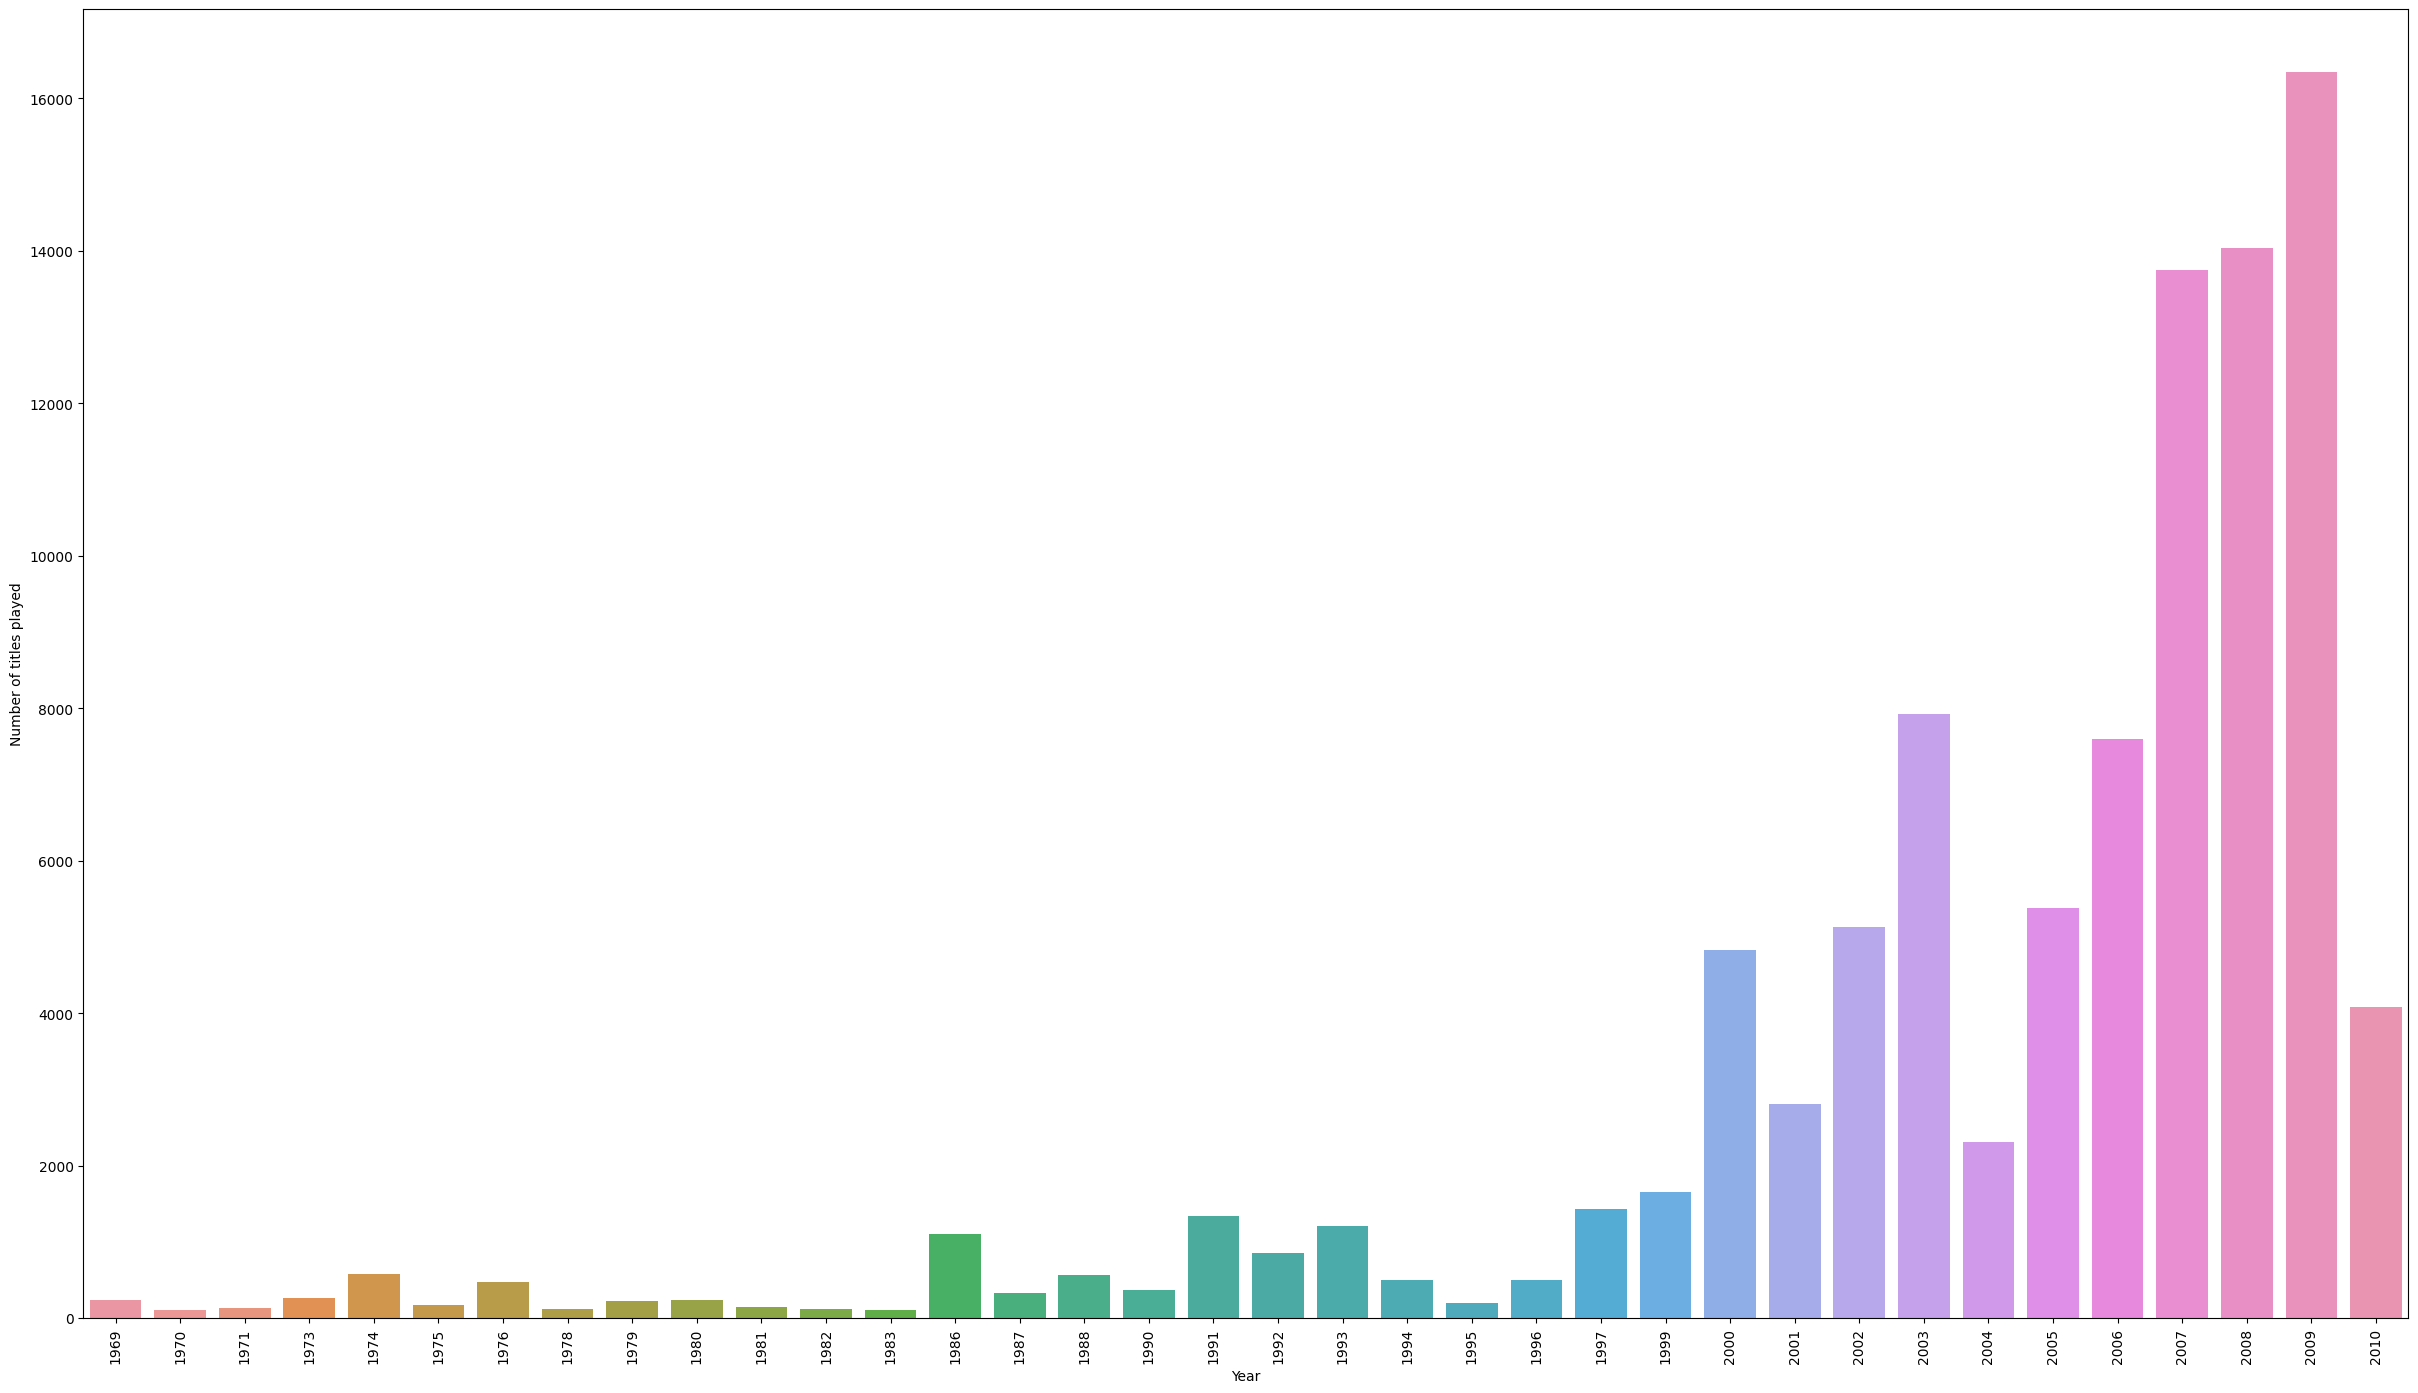

In [25]:
# Set the figure size

plt.figure(figsize=(30,17))

# Create a barplot plot with y label as "number of titles played" and x -axis year

sns.barplot(x=df.index,y='title',data=df,estimator=np.median)

# Set the x label of the plot
plt.xlabel('Year')
plt.xticks(rotation=90)

# Set the y label of the plot
plt.ylabel('Number of titles played')

# Show the plot
plt.show()

#### **Observations and Insights:** #
- 16,000 number of songs are played in the year **2009**.
- A few number of songs were played in 1983 & 1970.

 The other insights can be drawn using exploratory data analysis

Now that we have explored the data, let's apply different algorithms to build recommendation systems.



## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [26]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column

avg_play_count = df_final.groupby(['song_id']).mean()['play_count']

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column

frequent_song = df_final.groupby(['song_id']).count()['play_count']



In [27]:
# Making a dataframe with the average_count and play_freq

final_play = pd.DataFrame({'average_count' : avg_play_count,'play_freq': frequent_song})

# Let us see the first five records of the final_play dataset

final_play.head()


,average_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [28]:
# Build the function to find top n songs

# Defining a function to get the top n songs based on the highest average play count and minimum number of playcounts

def top_n_products(dataframe,n,min_play_counts):

# Finding songs with minimum number of playcounts

    recommendations= final_play[final_play['average_count'] < min_play_counts]

# Sorting values with respect to average rating

    recommendations = recommendations.sort_values(by='average_count',ascending=False)

    return recommendations.index[:n]


In [29]:
# Recommend top 10 songs using the function defined above

list(top_n_products(final_play,10,50))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [30]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [31]:
# Import necessary libraries

# To compute the accuracy of models

from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count

from surprise.reader import Reader

# Class for loading datasets

from surprise.dataset import Dataset

# For tuning model hyperparameters

from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset

from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system

from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system

from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation

from surprise.model_selection import KFold

# For implementing clustering-based recommendation system

from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

 The metrics used for this problem to compare different models.

In [32]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? Any intuition behind using the threshold value of 1.5?

In [33]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)

reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"

loaded_data = Dataset.load_from_df(df_final[['user_id','song_id','play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42

trainset, testset = train_test_split(loaded_data, test_size = 0.4, random_state = 42)

 How changing the test size would change the results and outputs?

In [34]:
# Build the default user-user-similarity model

# Declaring the similarity options

sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1

sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset

sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model

precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- We have calculated **RMSE** to check **how far the overall predicted play counts** are from the **actual play counts**.
- Intuition of Recall: We are getting a **recall of ~0.692**, which means out of **all the relevant movies 69% are recommended**.
- Intuition of Precision: We are getting a **precision of ~ 0.396**, which means **out of all the recommended movies 40% are relevant**.
- Here **F_1 score** of the **baseline model is ~0.50**. It indicates that **mostly recommended movies were relevant and relevant movies were recommended**.


In [35]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [36]:
df_final.sort_values(by=['play_count'],ascending=False)

,user_id,song_id,play_count,title,release,artist_name,year
1625034,3237,3462,5,If I Had You,For Your Entertainment (Deluxe Version),Adam Lambert,2009
1751894,65100,310,5,Seven Nation Army,Seven Nation Army,The White Stripes,2003
409652,50962,7496,5,The Gift,We Don't Need To Whisper,Angels and Airwaves,2006
1753649,6692,7196,5,I Don't Need A Man,R&B Divas,The Pussycat Dolls,2005
409660,50962,8324,5,The Big Gundown,Invaders Must Die Remixes and Bonus Tracks,The Prodigy,2009
...,...,...,...,...,...,...,...
844806,3790,7399,1,Shiver,Parachutes,Coldplay,2000
844802,3790,7222,1,Master Of Puppets,Master Of Puppets,Metallica,1986
844800,3790,7131,1,Valerie,ESSENTIAL 08,Amy Winehouse,2007
844796,3790,7023,1,Diamond Dave,Ray Guns Are Not Just The Future,the bird and the bee,2009


In [37]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id

sim_user_user.predict(6958,447,r_ui = 1,verbose= True)

user: 6958       item: 447        r_ui = 1.00   est = 1.12   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=447, r_ui=1, est=1.1222839992769744, details={'actual_k': 40, 'was_impossible': False})

In [38]:
def n_users_not_listened_the_song(n, data, song_id):
    users_listened_the_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_listened_the_song))[:n] # where n is the number of elements to get in the list

In [39]:
n_users_not_listened_the_song(5,df_final,'447')

[8194, 49157, 32773, 8199, 40969]

In [40]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user

sim_user_user.predict(8194,447,verbose = True)


user: 8194       item: 447        r_ui = None   est = 1.33   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=447, r_ui=None, est=1.3267473545779291, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The output shows that **the predicted play count is over-estimated when compared to the actual play count for this user-item pair(6958,447)** by this **user-user-similarity-based baseline model**.
- The **output** also contains **"actual_k"**. It is the value of **K in KNN** that is used while training the model. The default value is 40
- As it is a test data, the actual play count r_ui is unknown/None.


Now, let's try to tune the model and see if we can improve the model performance.

In [41]:
# Setting up parameter grid to tune the hyperparameters

param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters

gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch

gs.fit(loaded_data)

# Best RMSE score

print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score

print(gs.best_params['rmse'])


1.0460648298165303
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [42]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user based collaborative filtering

sim_options = {'name': 'pearson_baseline',
               'user_based': True}


# Creating an instance of KNNBasic with optimal hyperparameter values

sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset

sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 30

precision_recall_at_k(sim_user_user_optimized)


RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**
- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model has increased slightly in comparison to the baseline model**. Along with this, **the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved slightly after hyperparameter tuning.

In [43]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2

sim_user_user_optimized.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [44]:
def n_songs_not_listened_the_user(n, data, user_id):
    songs_listened_the_user = set(data[data['user_id'] == user_id]['song_id'])
    all_songs = set(data['song_id'])
    return list(all_songs.difference(songs_listened_the_user))[:n] # where n is the number of elements to get in the list

In [45]:
n_songs_not_listened_the_user(5,df_final,6958)

[2048, 6148, 21, 22, 6175]

In [46]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

sim_user_user_optimized.predict(6958,2048,verbose = True)

user: 6958       item: 2048       r_ui = None   est = 1.47   {'actual_k': 22, 'was_impossible': False}


Prediction(uid=6958, iid=2048, r_ui=None, est=1.4708539906502014, details={'actual_k': 22, 'was_impossible': False})

**Observations and Insights:**
- **The actual play count is close to the predicted play count for this user-item pair** by this **Optimized user-user-similarity-based baseline model**.

- We have **predicted the play count for this user-item pair** based on the Optimized user-user-similarity-based baseline model.

 Along with making predictions on listened and unknown songs  we can  get 5 nearest neighbors (most similar) to a certain song

In [47]:
# Use inner id 0

sim_user_user_optimized.get_neighbors(0,k=5)


[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [48]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids

    recommendations = []

    # Creating an user item interactions matrix

    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet

    not_listened_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet

    for item_id in not_listened_songs:

        # Predicting the play counts for songs not listened by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play counts
        recommendations.append((item_id, est))

    # Sorting the predicted play counts in descending order

    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n]   # Returing top n highest predicted play counts  for this user

In [49]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine

recommendations =  get_recommendations(df_final,6958,5,sim_user_user_optimized)


In [50]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_counts"

pd.DataFrame(recommendations,columns = ['song_id','predicted_play_counts'])


,song_id,predicted_play_counts
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**
- using optimized user-user similarity recommender system, we have provided top 5 recommendations to the **user_id 6958**.


### Correcting the play_counts and Ranking the above songs

In [51]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts

    ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count

    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts

    ranked_songs['corrected_play_counts'] = ranked_songs['predicted_play_counts'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts

    ranked_songs = ranked_songs.sort_values('corrected_play_counts', ascending = False)

    return ranked_songs

 In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [52]:
# Applying the ranking_songs function on the final_play data

ranking_songs(recommendations,final_play)


,song_id,play_freq,predicted_play_counts,corrected_play_counts
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


**Observations and Insights:**
- While comparing the play counts of two songs, it is not only the **play count** that describe the **likelihood of the user to that song**. Along with the play count, the **number of users who have listened that song** also becomes important to consider. Due to this, we have calculated the **"corrected_play_counts"** for each song. Commonly higher the **"play_count" of a song more it is liked by users**. To interpret the above concept, a **song play_count 4 with play_freq 3 is less liked in comparison to a song play_count  3 with a play_freq of 60**. It has been **empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_freq of the song**.

- In the **corrected play_count formula**, we can add the **quantity `1 / np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some songs with play_count of 5 and **we can't have a play_count more than 5 for a song in this project.**.

- **The likelihood of the user_id 6958 to the song_id 5531 is higher compared to the other songs because of the higher corrected_play_counts 2.51 obtained using optimized user-user similarity based model.**

### Item Item Similarity-based collaborative filtering recommendation systems

In [53]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict play counts for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item)




RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**
- Here, **F_1 score** of the **baseline model** is **0.40**.

In [54]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [55]:
df_final.iloc[0:10]

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [56]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user

sim_item_item.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [57]:
n_users_not_listened_the_song(5,df_final,1671)

[8194, 49157, 32773, 8199, 40969]

In [58]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

sim_item_item.predict(8194,1671,verbose = True)


user: 8194       item: 1671       r_ui = None   est = 1.65   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
- The output shows that **the actual play count for this user-item pair(6958,1671) is 2, and the predicted play count is far from that**.

- The output shows that **there is no actual play count & only predicted play count** by this **item-item-similarity-based baseline model** for (8194,1671).


In [59]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters

param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }


# Performing 3-fold cross-validation to tune the hyperparameters

gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data

gs.fit(loaded_data)

# Find the best RMSE score

print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score

print(gs.best_params['rmse'])


1.0238779369430198
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


 How do the parameters affect the performance of the model? Can we improve the performance of the model further?  The list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [60]:
# Apply the best model found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering

sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item_optimized)



RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**
- We can observe that after tuning hyperparameters, **F_1 score of the model is better than the baseline model**. Along with this, **the RMSE of the model has gone down in comparison to the model with default hyperparameters**. Hence, we can say that the model performance has improved after hyperparameter tuning.

In [61]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)

sim_item_item_optimized.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [62]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user

sim_item_item_optimized.predict(6958,3232,verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**
- The output shows that **the actual play count for this user-item pair(6958,1671) is 2, and the predicted play count is close to that**.

- The output shows that **there is no actual play count & only predicted play count** by this **Optimized item-item-similarity-based model** for **(6958,3232)** user-item pair.

In [63]:
# Find five most similar items to the item with inner id 0

sim_item_item_optimized.get_neighbors(0,k=5)


[124, 523, 173, 205, 65]

In [64]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine

recommendations = get_recommendations(df_final,6958,5,sim_item_item_optimized)


In [65]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"

pd.DataFrame(recommendations, columns = ['song_id','predicted_play_count'])


,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [66]:
# Applying the ranking_songs function

ranking_songs(recommendations,final_play)


,song_id,play_freq,predicted_play_counts,corrected_play_counts
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**
- **The likelihood of the user_id 6958 to the song_id 2342 is higher compared to the other songs because of the higher corrected_play_counts 2.55 obtained using optimized item-item similarity based model.**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [67]:
# Build baseline model using svd

# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(svd)


RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [68]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2

svd.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [69]:
n_users_not_listened_the_song(5,df_final,3232)

[8194, 49157, 32773, 8199, 40969]

In [70]:
# Making a prediction for the user who has not listened to the song (song_id 3232)

svd.predict(8194,3232,verbose = True)



user: 8194       item: 3232       r_ui = None   est = 1.76   {'was_impossible': False}


Prediction(uid=8194, iid=3232, r_ui=None, est=1.7572448273880166, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [71]:
# Set the parameter space to tune

param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation

gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data

gs.fit(loaded_data)

# Best RMSE score

print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score

print(gs.best_params['rmse'])


1.013215280139937
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


 How do the parameters affect the performance of the model? Can we improve the performance of the model further?  The available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [72]:
# Building the optimized SVD model using optimal hyperparameters

svd_algo_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset

svd_algo_optimized = svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE

precision_recall_at_k(svd_algo_optimized)


RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

- The **F1-score** for the baseline and optimized SVD models are approximatly the same.However, the optimized SVD has reduced the **RMSE** compared to baseline SVD model.

In [73]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671

svd_algo_optimized.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [74]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating

svd_algo_optimized.predict(6958,3232,verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**

- The optimized SVD's predicted play count is better than the predicted play count of SVD baseline model for the user-item pair(6958,1671).

In [75]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm

recommendations = get_recommendations(df_final,6958,5,svd_algo_optimized)

pd.DataFrame(recommendations, columns = ['song_id','predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.601899
1,5653,2.108728
2,8324,2.014091
3,6450,1.952493
4,9942,1.940115


In [76]:
# Ranking songs based on above recommendations

ranking_songs(recommendations,final_play)


,song_id,play_freq,predicted_play_counts,corrected_play_counts
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**
- **The likelihood of the user_id 6958 to the song_id 7224 is higher compared to the other songs because of the higher corrected_play_counts 2.505 obtained using optimized SVD model.**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [77]:
# Make baseline clustering model

# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(clust_baseline)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [78]:
df_final.iloc[0:10]

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [79]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [80]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user

clust_baseline.predict(6958,3232,verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [81]:
# Set the parameter space to tune

param_grid = {'n_cltr_u': [1,4,7], 'n_cltr_i': [1,4,7], 'n_epochs': [30,40,50]}

# Performing 3-fold grid search cross-validation

gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data

gs.fit(loaded_data)

# Best RMSE score

print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score

print(gs.best_params['rmse'])


1.029967055904739
{'n_cltr_u': 1, 'n_cltr_i': 1, 'n_epochs': 30}


 How do the parameters affect the performance of the model? Can we improve the performance of the model further? The available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [82]:
# Train the tuned Coclustering algorithm

# Using tuned Coclustering algorithm
Coclustering_based_optimized = CoClustering(n_cltr_u = 1, n_cltr_i = 1, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
Coclustering_based_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(Coclustering_based_optimized)


RMSE: 1.0315
Precision:  0.395
Recall:  0.587
F_1 score:  0.472


**Observations and Insights:**

- The **F1-Score** of the baseline & optimized Co-Clustering model are  same.


In [83]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671

Coclustering_based_optimized.predict(6958,1671,r_ui = 2,verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.13   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1257867112267959, details={'was_impossible': False})

In [84]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating

Coclustering_based_optimized.predict(6958,3232,verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3101301455702306, details={'was_impossible': False})

**Observations and Insights:**
- The output shows that **the actual play count for this user-item pair(6958,1671) is 2, and the predicted play count is far from that**.

- The output shows that **there is no actual play count & only predicted play count** by this **Optimized co-clustering based model** for **(6958,3232)** user-item pair.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [85]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm

recommendations = get_recommendations(df_final,6958,5,Coclustering_based_optimized)


### Correcting the play_count and Ranking the above songs

In [86]:
# Ranking songs based on the above recommendations

ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_play_counts,corrected_play_counts
2,7224,107,2.926402,2.829728
3,6450,102,2.166664,2.067649
4,8324,96,2.143103,2.041041
1,5653,108,2.118781,2.022556
0,9942,150,2.046644,1.964994


**Observations and Insights:**
- **The likelihood of the user_id 6958 to the song_id 7224 is higher compared to the other songs because of the higher corrected_play_counts 2.829 obtained using optimized co-clustering model.**

### Content Based Recommendation Systems

So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Now we are considering song features into account.

In [87]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [88]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"

df_small = df_final
df_small['text'] = df_small[['title','release','artist_name']].apply(lambda x: '  '.join(x), axis=1)
df_small['text']


200           Daisy And Prudence  Distillation  Erin McKeown
202        The Ballad of Michael Valentine  Sawdust  The ...
203        I Stand Corrected (Album)  Vampire Weekend  Va...
204          They Might Follow You  Tiny Vipers  Tiny Vipers
205          Monkey Man  You Know I'm No Good  Amy Winehouse
                                 ...                        
1999734         Half Of My Heart  Battle Studies  John Mayer
1999736    Bitter Sweet Symphony  Bitter Sweet Symphony  ...
1999745      The Police And The Private  Live It Out  Metric
1999755           Just Friends  Back To Black  Amy Winehouse
1999765    He Can Only Hold Her  Back To Black  Amy Wineh...
Name: text, Length: 117876, dtype: object

In [89]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data

df_small = df_small[['user_id','song_id','play_count','title','text']]

# Drop the duplicates from the title column

df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index

df_small = df_small.set_index(['title'])

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The ...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Va...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [90]:
# Create the series of indices from the data

indices = pd.Series(df_small.index)

indices[0: 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [91]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library

nltk.download("punkt")

# Download stopwords library

nltk.download("stopwords")

# Download wordnet

nltk.download("wordnet")

# Import regular expression

import re

# Import word_tokenizer

from nltk import word_tokenize

# Import WordNetLemmatizer

from nltk.stem import WordNetLemmatizer

# Import stopwords

from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [92]:
# Create a function to tokenize the text

def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems


In [93]:
# Create tfidf vectorizer

tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array

songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

pd.DataFrame(songs_tfidf)



,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
len(tfidf.vocabulary_) # indicating 1437 unique words or tokens in the given 561 text or documents

1437

In [95]:
# Compute the cosine similarity for the tfidf above output

# Calculating the cosine similarity
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

# Let us see the above array
similar_songs


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [96]:
# Function that takes in song title as input and returns the top 10 recommended songs

def   recommendations(title, similar_songs):

      recommended_songs = []

      indices = pd.Series(df_small.index)

      # Getting the index of the song that matches the title

      idx = indices[indices == title].index[0]

      # Creating a Series with the similarity scores in descending order

      score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)


      # Getting the indexes of the 10 most similar songs

      top_10_indexes = list(score_series.iloc[1 : 11].index)
      print(top_10_indexes)


      # Populating the list with the titles of the best 10 matching songs

      for i in top_10_indexes:
          recommended_songs.append(list(df_small.index)[i])

      return recommended_songs


Recommending 10 songs similar to Learn to Fly

In [97]:
# Make the recommendation for the song with title 'Learn To Fly'

recommendations('Learn To Fly',similar_songs)


[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**
- The song belongs to **rock,pop,country,alternative rock,drum and bass** genres, and the **majority of our recommendations** lie in one or more of these genres. It implies that the resulting recommendation system is working well.


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on
     chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively
  better? Is there scope to improve the performance further?
    - We built recommendation systems using six different algorithms. They are as follows:
        - **Popularity-based recommendation systems**
        - **User-User similarity-based collaborative filtering**
        - **Item-Item similarity-based collaborative filtering**
        - **Model-based collaborative filtering (matrix factorization)**
        - **clustering-based recommendation systems**
        - **content-based recommendation systems**
        - The **surprise** library was used to demonstrate**"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," "model-based collaborative filtering (matrix factorization)"clustering-based recommendation systems"and "content-based recommendation systems"**algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.
      Grid search cross-validation is applied to find the best working model, and with that the corresponding predictions are made.
    - To evaluate the performance of these models, **precision@k and recall@k** are used in this project.Using these two metrics F_1 score is calculated for each working model.
      - Overall, the user-user similarity-based recommendation system has given the best performance in terms of the **F1-score as 53**. Meanwhile,the least performance is given by the clustering-based recommendation system as **F1-score 47**.
    - We can try to improve the performance of these models using hyperparameter tuning.


**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
  - The user_id & song_id were encrypted columns.However, we used Label encoding to convert it into numerical features.
  - The metric used by this problem to compare the performance of the model is F1-score.
  - For a song to be recommended, we have to consider the minimum number of play counts. Here we set as threshold = 1.5. If the predicted play count is less than the threshold then the model will not give a good F1-score or RMSE will be high.
  - All the recommender systems were implemented based on the play count feature(numerical value).However, The content-based recommender systems recommended top 10 songs only based on the content of the song such as using title,artist name and release(categorical values).



**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
  - **User-user similarity based collaborative filtering** is the best model to be adopted since this model gave best performance in terms of **F1-score as 53**.
  - **Content-based recommendation system** was able to recommend the top 10 songs **without using play count feature**. Subsequently,the recommendations were based on other information/features of songs such as **title,artist name and release**.
  - As a final proposal, We can use a hybrid model of these above recommendation systems.
